# Classification

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.svm import SVC
import random
from scipy import stats


from support_functions import plot_tree_graph, plot_confusion_matrix
from in_out import load_data
from feature_analysis import best_n_features, load_best_hyperparameters

Using TensorFlow backend.


In [2]:
DATA_PATH = '../definitive_data_folder'

labels = ['ECTODERM', 'NEURAL_CREST', 'MESODERM', 'ENDODERM']

## Random Forest

In [24]:
def call_random_forest_classifier(X_train, Y_train, X_test, Y_test, hyperparameters, name):
    
    # classify
    random_forest = RandomForestClassifier(**hyperparameters)

    random_forest = random_forest.fit(X_train, Y_train)
    
    # plot the graph
    plot_tree_graph(random_forest,X_train.columns, name)
    
    # plot the classification results
    score = random_forest.score(X_test, Y_test)
    y_test_pred = random_forest.predict(X_test)
    
    cnf_matrix = metrics.confusion_matrix(Y_test, y_test_pred,
                                          labels=labels)
    # Plot normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                          title='Normalized confusion matrix', name=name)
    

Loaded


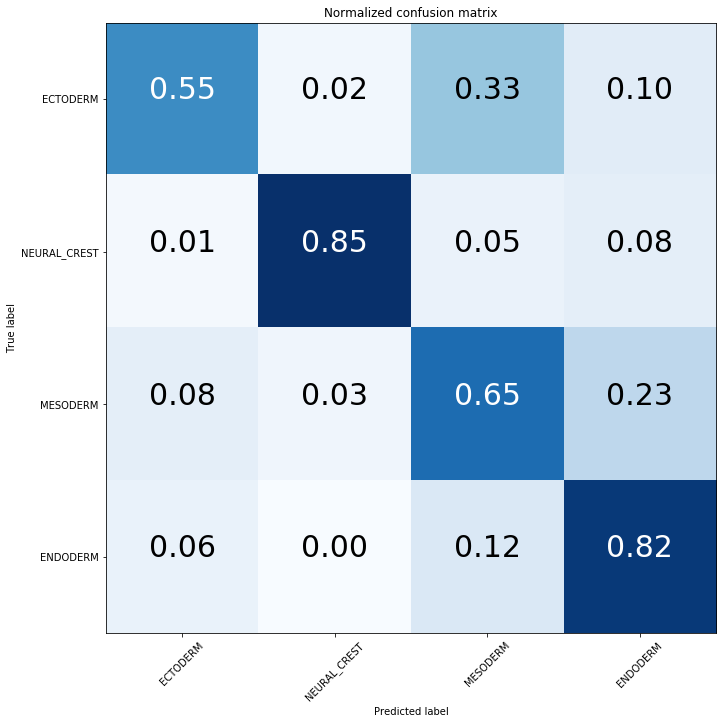

In [27]:
X_train, Y_train, X_test, Y_test = load_data('dataset')

best_features = best_n_features(20)
hyperparameters = load_best_hyperparameters()

call_random_forest_classifier(X_train[best_features], Y_train, X_test[best_features], Y_test, hyperparameters,'rf_test')

## SVM

In [3]:
def call_svm(X_train, Y_train, X_test, Y_test, name):
    n_iter_search = 500
    param_dist = {"C": stats.uniform(0, 1),
                  "kernel": ['rbf', 'linear', 'poly', 'sigmoid'],
                  "decision_function_shape": ['ovo', 'ovr']
                  }
    clf = SVC(class_weight='balanced')

    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, iid=False,
                                       n_iter=n_iter_search, pre_dispatch=3, n_jobs=-1)
    random_search.fit(X_train, Y_train.values.ravel())
    
    best_hyperparameters = random_search.best_params_
    
    with open(DATA_PATH + '/svm_hyperparameters','w') as f:
        f.write(best_hyperparameters)

    print('trained')
    score = random_search.score(X_test, Y_test)

    print 'SVM', score
    y_test_pred = random_search.predict(X_test)
    # Compute confusion matrix
    class_names = labels
    cnf_matrix = metrics.confusion_matrix(Y_test, y_test_pred,
                                          labels=class_names)
    # Plot normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                          title='Normalized confusion matrix', name=name)


In [4]:
X_train, Y_train, X_test, Y_test = load_data('dataset')

best_features = best_n_features(20)

call_svm(X_train, Y_train, X_test, Y_test, 'svm_test')

Loaded


TypeError: expected a string or other character buffer object